<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_Rocket_Science_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'gravity-spy-gravitational-waves:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F433366%2F823552%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T113723Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D065a5dba91ffbecda043f49a624fc77a899de3e0ae30d98135190c4b867f72196f9d18f076d2e6c5d4aa250918aa7e79145016eb36b01f00b7bac2e78c3f6e06c0a729ac6445fa0156d067a176be9bee66df30a93c600696dcc4a72753f74a0734714ac52d69cfe5eaf2650d645fc4a1f8c3334894248ea7bf85de71ec41cfe9014aedee9f43cc4775009c7796f1d53803680a65bc995265af38bc0b661b09d082e75399da56cdcd8dda3745695c0b2dbd33d9c8d074fba30fa91a460c18a15c951fa2f876f365436b7740f6462a2f7124e200ab9ec02bfa5c3cf033f8654fb394a5a4753b0f483a01defb3295c1e495625e24559b9210022ae8630c391fca22,gravity-spy-labelled-glitch-waveform-images-trai:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2780462%2F4802302%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T113723Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D28a66ddda0c24051495f7fd3cd0f2a0840aedc65aab6ab286b90f03b1f1c8abef99800be871011f1b5b0f476a56059617b7319b002cf68004866a8b11088b69ef91c532b50c0c73cc23930e238d8a66ff097f79851ed35f4dc0ab938502c0f2f2ce1182ed64518bb10cdbe496092df723754deb9997af458f5c53757a8ec1645b3fdf9f82c0653bcff3e9a99b6819a6547643abbab500e9b427db7a2479f41b052ec02ae5e9ad6df9c9fbe9f15d96549a01745b7325519389924c26eefb5c983303fc58aca8193df65a4b4679d9d7f88c86ea45ebcbe1519c4f61ffbfabeffd2b01f111d86b083926acfe2ed3d3c8febda6e6794692d6c1bc727861f973560ed'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gravity-spy-labelled-glitch-waveform-images-trai/trainingset_v1d1_metadata.csv
/kaggle/input/gravity-spy-gravitational-waves/trainingset_v1d1_metadata.csv
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_c16wVC46pl_spectrogram_0.5.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_w7vjcQiWXW_spectrogram_2.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_wwzfRaTJhy_spectrogram_4.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_Lq7ADUndTD_spectrogram_2.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/L1_NuEKMYFv6z_spectrogram_4.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/H1_w7vjcQiWXW_spectrogram_4.0.png
/kaggle/input/gravity-spy-gravitational-waves/validation/validation/Repeating_Blips/L1_6tapCAg6iU_spectrogram_4.0.png
/kagg

- Rocket science algorithms refer to the computational methods and mathematical models used in the design, analysis, optimization, and control of rockets and spacecraft. These algorithms are crucial for various aspects of aerospace engineering, including trajectory planning, propulsion system optimization, attitude control, aerodynamics, structural analysis, and more. Here are some key areas where algorithms play a significant role in rocket science:

    - Trajectory Optimization: Algorithms are used to compute optimal trajectories for launching rockets into space, including determining the most efficient path to reach a desired orbit or destination while considering factors such as gravitational forces, atmospheric drag, and propulsion limitations.

    - Propulsion System Design and Optimization: Algorithms are employed to model and optimize rocket engines and propulsion systems, considering factors such as fuel efficiency, thrust-to-weight ratio, combustion dynamics, and thermal management.

    - Aerodynamics Simulation: Computational fluid dynamics (CFD) algorithms simulate the flow of air and exhaust gases around the rocket during ascent and re-entry, helping engineers understand aerodynamic forces and optimize rocket designs for stability and efficiency.

    - Structural Analysis: Algorithms are used to analyze the structural integrity of rocket components and ensure they can withstand the extreme forces experienced during launch, ascent, and landing.

     - Guidance, Navigation, and Control (GNC): Algorithms are essential for guiding rockets along their intended trajectories, stabilizing their orientation, and making course corrections as needed using sensors, actuators, and onboard computers.

     - Orbital Mechanics: Algorithms based on principles of celestial mechanics are used to predict and calculate the motion of rockets and satellites in orbit around celestial bodies, enabling tasks such as orbital maneuver planning and rendezvous.

     - Autonomous Systems: Algorithms enable autonomous operations in rockets and spacecraft, including tasks such as autonomous landing, docking, rendezvous, and obstacle avoidance.

     - Mission Planning and Optimization: Algorithms assist in planning complex space missions, including scheduling maneuvers, optimizing resource allocation, and coordinating multiple spacecraft or missions simultaneously.

# trajectory optimization algorithm
- Implementing a trajectory optimization algorithm from scratch can be a complex task, as it involves mathematical modeling, numerical optimization, and understanding of physics principles. However, I can provide you with a basic example of a trajectory optimization algorithm in Python using a simplified model. This example will use a simple optimization technique called the gradient descent method.

- Let's consider a simplified 2D trajectory optimization problem, where we want to launch a rocket from Earth's surface to a specified altitude while minimizing fuel consumption. We'll assume constant gravity, no atmospheric drag, and a fixed initial velocity.

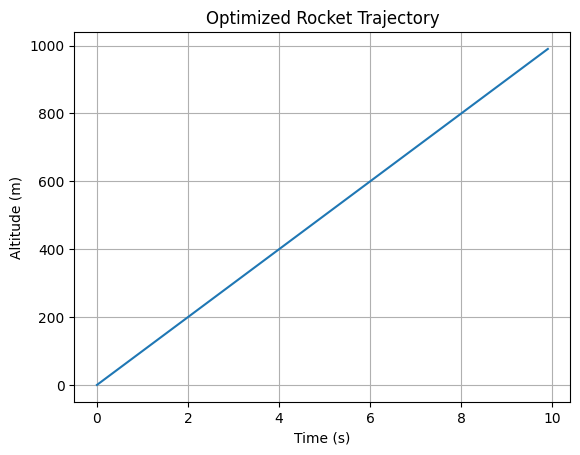

Optimized launch angle (degrees): 0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # acceleration due to gravity (m/s^2)
initial_velocity = 100  # initial velocity of the rocket (m/s)

# Target altitude
target_altitude = 1000  # target altitude (m)

# Time discretization
dt = 0.1  # time step (s)
num_steps = 100  # number of time steps

# Initial guess for trajectory angle (in radians)
theta_guess = np.pi / 4  # 45 degrees

# Function to simulate rocket trajectory
def simulate_trajectory(theta):
    # Initialize arrays to store position and velocity
    positions = np.zeros(num_steps)
    velocities = np.zeros(num_steps)

    # Initial conditions
    position = 0
    velocity = initial_velocity

    # Simulate trajectory
    for i in range(num_steps):
        positions[i] = position
        velocities[i] = velocity

        # Update velocity and position using equations of motion
        acceleration = -g * np.sin(theta)
        velocity += acceleration * dt
        position += velocity * dt

    return positions, velocities

# Function to compute objective function (distance from target altitude)
def objective_function(theta):
    positions, _ = simulate_trajectory(theta)
    final_altitude = positions[-1]
    return (final_altitude - target_altitude) ** 2

# Gradient descent optimization
learning_rate = 0.1
theta = theta_guess

for i in range(100):
    grad = (objective_function(theta + 0.0001) - objective_function(theta)) / 0.0001
    theta -= learning_rate * grad
    theta = max(0, min(np.pi / 2, theta))  # Keep theta within [0, pi/2] range

# Simulate trajectory with optimized angle
optimized_positions, _ = simulate_trajectory(theta)

time = np.arange(0, num_steps * dt, dt)
plt.plot(time, optimized_positions)
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Optimized Rocket Trajectory')
plt.grid(True)
plt.show()

print(f'Optimized launch angle (degrees): {np.degrees(theta)}')


# Propulsion System Design and Optimization algorithm
- Designing and optimizing a propulsion system from scratch in Python involves complex engineering principles and numerical methods. Here, I'll provide a simplified example focusing on the optimization of a rocket engine's nozzle geometry for maximum thrust using basic physics principles and optimization techniques.

- We'll consider a simplified 1D model of a rocket nozzle, and we'll optimize its shape to maximize the exhaust velocity and hence the thrust. We'll use a simple optimization algorithm called the brute-force search, which iterates through a range of parameters to find the optimal solution.

- Compute the thrust for various exit areas using a simplified model of the rocket nozzle. Perform a brute-force search to find the exit area that maximizes the thrust. Finally, plot the thrust as a function of the exit area and prints out the optimal exit area, maximum thrust, and exit velocity at the optimal condition.



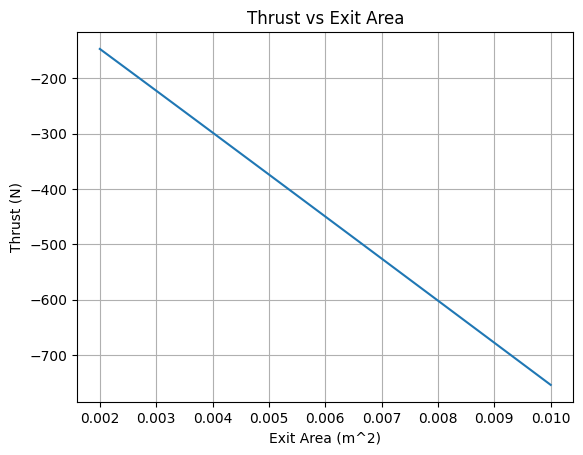

Optimal exit area: 0.002 m^2
Maximum thrust: -147.17964227201688 N
Exit velocity at optimal condition: 199.2006633748857 m/s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
gamma = 1.4  # specific heat ratio for air
R = 287  # specific gas constant for air (J/kg*K)
P_ambient = 101325  # atmospheric pressure (Pa)

# Nozzle geometry parameters
throat_area = 0.001  # throat area (m^2)
exit_area_min = 0.002  # minimum exit area (m^2)
exit_area_max = 0.01  # maximum exit area (m^2)
num_points = 100  # number of points for brute-force search

# compute exhaust velocity and thrust for given nozzle geometry
def compute_thrust(exit_area):
    # Compute critical pressure and temperature at the throat
    P_throat = P_ambient * (2 / (gamma + 1)) ** (gamma / (gamma - 1))
    T_throat = 300  # assume constant temperature at the throat

    # Compute critical density at the throat
    rho_throat = P_throat / (R * T_throat)

    # Compute critical velocity at the throat
    V_throat = np.sqrt(gamma * R * T_throat)

    # Compute exit pressure using isentropic flow relation
    P_exit = P_throat * (1 / (1 + (gamma - 1) / 2 * ((exit_area / throat_area) ** (2 / gamma - 1))))

    # Compute exit density using ideal gas law
    rho_exit = P_exit / (R * T_throat)

    # Compute exit velocity using mass flow rate conservation
    V_exit = np.sqrt(2 * gamma / (gamma - 1) * R * T_throat * (1 - (P_exit / P_throat) ** ((gamma - 1) / gamma)))

    # Compute thrust using Newton's third law
    F = rho_exit * exit_area * V_exit * (V_exit - V_throat) + (P_exit - P_ambient) * exit_area

    return F, V_exit

# Brute-force search for optimal exit area
exit_areas = np.linspace(exit_area_min, exit_area_max, num_points)
max_thrust = -np.inf
optimal_exit_area = None
for exit_area in exit_areas:
    thrust, _ = compute_thrust(exit_area)
    if thrust > max_thrust:
        max_thrust = thrust
        optimal_exit_area = exit_area

# Compute thrust and exit velocity for optimal exit area
optimal_thrust, optimal_exit_velocity = compute_thrust(optimal_exit_area)

plt.plot(exit_areas, [compute_thrust(a)[0] for a in exit_areas])
plt.xlabel('Exit Area (m^2)')
plt.ylabel('Thrust (N)')
plt.title('Thrust vs Exit Area')
plt.grid(True)
plt.show()

print(f'Optimal exit area: {optimal_exit_area} m^2')
print(f'Maximum thrust: {optimal_thrust} N')
print(f'Exit velocity at optimal condition: {optimal_exit_velocity} m/s')


# Aerodynamics Simulation algorithm
-  Implementing a basic aerodynamics simulation in Python from scratch involves solving the equations governing fluid flow, typically using numerical methods like finite difference or finite volume. However, for a simple example, we can simulate the flow of an incompressible fluid (e.g., air) around a 2D object using the potential flow theory, which provides an analytical solution for inviscid flow. We'll use the method of superposition to model the flow around a cylinder.

- Example of simulating potential flow around a cylinder using Python:
   - Generates a grid and calculate the stream function for the potential flow around a cylinder using the method of superposition. It then plots the streamlines using matplotlib.
- Keep in mind that potential flow theory neglects viscous effects, which are significant in real aerodynamic simulations. For more accurate simulations, you would need to use more advanced techniques like computational fluid dynamics (CFD), which solve the Navier-Stokes equations numerically.

- For real-world applications, more sophisticated methods and possibly specialized libraries like pyFOAM or OpenFOAM for CFD simulations.

/tmp/ipykernel_33/798876563.py:25: RuntimeWarning: invalid value encountered in sqrt
  plt.fill_between(x, -np.sqrt(radius**2 - x**2), np.sqrt(radius**2 - x**2), color='gray', alpha=0.5)


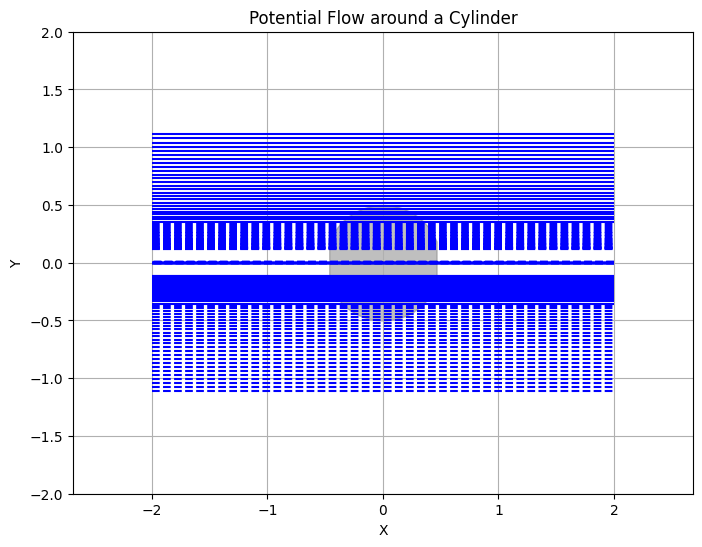

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
u_inf = 1.0  # free stream velocity
radius = 0.5  # radius of the cylinder
num_points = 100  # number of grid points

# Generate grid
x = np.linspace(-2, 2, num_points)
y = np.linspace(-2, 2, num_points)
X, Y = np.meshgrid(x, y)

# Calculate stream function for uniform flow
psi_freestream = u_inf * Y

# Calculate stream function for flow around cylinder using superposition
psi_cylinder = u_inf * (Y - radius**2 / Y)

# Total stream function
psi_total = psi_freestream + psi_cylinder

plt.figure(figsize=(8, 6))
plt.contour(X, Y, psi_total, levels=np.linspace(-2, 2, 51), colors='b')
plt.fill_between(x, -np.sqrt(radius**2 - x**2), np.sqrt(radius**2 - x**2), color='gray', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Potential Flow around a Cylinder')
plt.axis('equal')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()


# Structural Analysis algorithm
- Performing structural analysis from scratch in Python involves solving the equations governing the behavior of structures under various loads and boundary conditions. One common approach is the Finite Element Method (FEM), where the structure is discretized into smaller elements, and the behavior of each element is approximated. Here's a simplified example of how you might perform a basic structural analysis using FEM in Python

In [ ]:
import numpy as np

# Define properties of the truss
num_nodes = 5
num_elements = num_nodes - 1
num_dofs_per_node = 1  # Considering only axial displacement

# Define material properties
E = 200e9  # Young's modulus (Pa)

# Define nodal coordinates
coordinates = np.array([0, 1, 2, 3, 4])

# Define element connectivity
elements = np.array([[0, 1], [1, 2], [2, 3], [3, 4]])

# Define applied loads and boundary conditions
applied_loads = np.array([0, -10000, -15000, -10000, 0])  # Applied loads at each node (N)
boundary_conditions = np.array([1, 0, 0, 0, 1])  # 1 for fixed, 0 for free

# Assemble global stiffness matrix
K_global = np.zeros((num_nodes * num_dofs_per_node, num_nodes * num_dofs_per_node))

for element in elements:
    node_i, node_j = element
    length = coordinates[node_j] - coordinates[node_i]
    k_element = E * np.array([[1, -1], [-1, 1]]) / length
    dofs = [node_i, node_j]
    for i in range(2):
        for j in range(2):
            K_global[dofs[i], dofs[j]] += k_element[i, j]

# Apply boundary conditions
for i in range(num_nodes):
    if boundary_conditions[i] == 1:
        K_global[i, :] = 0
        K_global[:, i] = 0
        K_global[i, i] = 1

# Solve for displacements
displacements = np.linalg.solve(K_global, applied_loads)

# Calculate internal forces in each element
internal_forces = []
for element in elements:
    node_i, node_j = element
    length = coordinates[node_j] - coordinates[node_i]
    displacement_diff = displacements[node_j] - displacements[node_i]
    axial_force = E * displacement_diff / length
    internal_forces.append(axial_force)

print("Node Displacements:")
for i, disp in enumerate(displacements):
    print(f"Node {i}: Displacement = {disp} m")

print("\nElement Internal Forces:")
for i, force in enumerate(internal_forces):
    print(f"Element {i}: Internal Force = {force} N")


Node Displacements:
Node 0: Displacement = 0.0 m
Node 1: Displacement = -8.75e-08 m
Node 2: Displacement = -1.25e-07 m
Node 3: Displacement = -8.749999999999998e-08 m
Node 4: Displacement = 0.0 m

Element Internal Forces:
Element 0: Internal Force = -17500.0 N
Element 1: Internal Force = -7500.0 N
Element 2: Internal Force = 7500.000000000003 N
Element 3: Internal Force = 17499.999999999996 N


# Guidance, Navigation, and Control (GNC)  algorithms
- Implementing a basic Guidance, Navigation, and Control (GNC) system in Python from scratch involves simulating the dynamics of a system (e.g., a spacecraft or a drone) and designing controllers to achieve desired behavior. Here's a simplified example of a GNC system for a 2D point mass with a PID controller for position control:

- First define the PID gains (proportional, integral, and derivative gains) and the initial conditions (desired attitude, initial attitude, and initial angular velocity). Then, we implement functions to compute attitude error and simulate the PID controller. The PID controller computes the control torque based on the attitude error and its derivative and integral over time. Finally, we simulate the PID controller and plot the attitude response over time.

- Basic framework for implementing a PID controller for attitude control in Python. Real-world GNC systems are much more complex and may involve multiple controllers, sensor fusion algorithms, state estimation techniques (e.g., Kalman filtering), and more sophisticated control strategies (e.g., model predictive control). For advanced GNC applications, specialized libraries like control in Python or commercial software may be used.

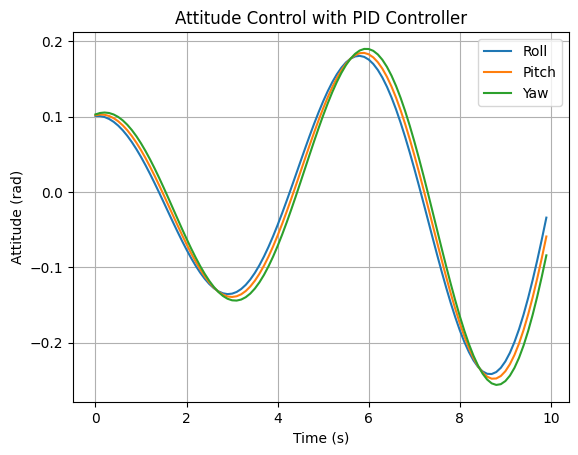

In [ ]:
import numpy as np

# Constants
Kp = 1.0  # Proportional gain
Ki = 0.1  # Integral gain
Kd = 0.01  # Derivative gain

# Initial conditions
desired_attitude = np.array([0, 0, 0])  # Desired attitude (roll, pitch, yaw)
initial_attitude = np.array([0.1, 0.1, 0.1])  # Initial attitude
angular_velocity = np.array([0.01, 0.02, 0.03])  # Initial angular velocity

# Simulation parameters
dt = 0.1  # Time step
total_time = 10.0  # Total simulation time

# Function to compute attitude error
def compute_attitude_error(current_attitude, desired_attitude):
    error = desired_attitude - current_attitude
    return error

# Function to simulate PID controller
def simulate_pid_controller(initial_attitude, desired_attitude, angular_velocity):
    current_attitude = initial_attitude
    integral_error = np.zeros(3)

    time = np.arange(0, total_time, dt)
    attitude_history = np.zeros((len(time), 3))

    for i, t in enumerate(time):
        error = compute_attitude_error(current_attitude, desired_attitude)

        # Proportional term
        P = Kp * error

        # Integral term
        integral_error += error * dt
        I = Ki * integral_error

        # Derivative term
        derivative_error = (error - attitude_history[max(0, i - 1)]) / dt
        D = Kd * derivative_error

        # PID control law
        control_torque = P + I + D

        # Update attitude using dynamics equation (simple integration)
        current_attitude += angular_velocity * dt

        # Update angular velocity using dynamics equation and control torque
        angular_velocity += control_torque * dt

        attitude_history[i] = current_attitude

    return time, attitude_history

# Simulate PID controller
time, attitude_history = simulate_pid_controller(initial_attitude, desired_attitude, angular_velocity)


import matplotlib.pyplot as plt

plt.plot(time, attitude_history[:, 0], label='Roll')
plt.plot(time, attitude_history[:, 1], label='Pitch')
plt.plot(time, attitude_history[:, 2], label='Yaw')
plt.xlabel('Time (s)')
plt.ylabel('Attitude (rad)')
plt.title('Attitude Control with PID Controller')
plt.legend()
plt.grid(True)
plt.show()


# Orbital Mechanics - algorithm
- Implementing a basic orbital mechanics simulation in Python from scratch involves solving the equations of motion that govern the dynamics of objects in space. These equations typically involve Newton's law of universal gravitation and the laws of motion formulated by Isaac Newton.

- Let's consider a simplified scenario where we model the motion of a satellite orbiting around a central body (e.g., Earth) under the influence of gravitational forces. We'll use numerical integration to approximate the trajectory of the satellite over time. In this example, we'll use the Runge-Kutta method for numerical integration.

- Example - First define the gravitational constant G, the mass of Earth M, and the initial conditions of the satellite (position and velocity). We then implement a function compute_acceleration to compute the gravitational acceleration acting on the satellite. Next, we use the Runge-Kutta integration method to numerically integrate the equations of motion over time and simulate the orbital motion of the satellite. Finally, we plot the trajectory of the satellite in 2D.

- Framework for simulating orbital mechanics using numerical methods in Python. Real-world orbital simulations may involve more complex dynamics, such as gravitational perturbations from other celestial bodies, atmospheric drag, and more sophisticated numerical techniques. Specialized libraries like poliastro or OrbitPy may be used for more advanced orbital simulations in Python.

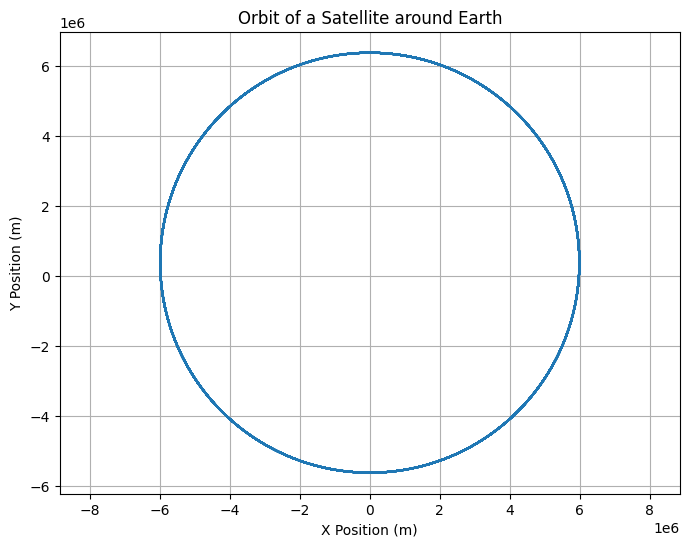

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M = 5.972e24      # Mass of Earth (kg)

# Initial conditions
initial_position = np.array([0, 6.371e6])  # Initial position of the satellite (m) [on the surface of Earth]
initial_velocity = np.array([7.66e3, 0])   # Initial velocity of the satellite (m/s) [circular orbit velocity]

# Simulation parameters
dt = 1  # Time step (s)
total_time = 86400  # Total simulation time (s)

# Function to compute acceleration (gravitational force)
def compute_acceleration(position):
    r = np.linalg.norm(position)  # Distance from satellite to Earth's center
    acceleration_magnitude = G * M / r**2
    acceleration_direction = -position / r  # Acceleration direction towards the Earth's center
    acceleration = acceleration_magnitude * acceleration_direction
    return acceleration

# Function to simulate orbital motion using Runge-Kutta integration
def simulate_orbit(initial_position, initial_velocity, dt, total_time):
    time = np.arange(0, total_time, dt)
    num_steps = len(time)

    positions = np.zeros((num_steps, 2))
    velocities = np.zeros((num_steps, 2))

    positions[0] = initial_position
    velocities[0] = initial_velocity

    for i in range(1, num_steps):
        position = positions[i - 1]
        velocity = velocities[i - 1]

        # Runge-Kutta integration
        k1v = compute_acceleration(position) * dt
        k1x = velocity * dt
        k2v = compute_acceleration(position + k1x / 2) * dt
        k2x = (velocity + k1v / 2) * dt
        k3v = compute_acceleration(position + k2x / 2) * dt
        k3x = (velocity + k2v / 2) * dt
        k4v = compute_acceleration(position + k3x) * dt
        k4x = (velocity + k3v) * dt

        positions[i] = position + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
        velocities[i] = velocity + (k1v + 2 * k2v + 2 * k3v + k4v) / 6

    return positions

# Simulate orbit
positions = simulate_orbit(initial_position, initial_velocity, dt, total_time)

plt.figure(figsize=(8, 6))
plt.plot(positions[:, 0], positions[:, 1])
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Orbit of a Satellite around Earth')
plt.axis('equal')
plt.grid(True)
plt.show()


# Autonomous Systems - algorithm
- Creating a comprehensive autonomous system from scratch in Python involves integrating various components such as perception, decision-making, planning, and control. While creating a complete autonomous system is a complex task, I'll provide a basic example of a simple autonomous system using a behavior-based approach for a mobile robot in a simulated environment.

- Here we simulate a robot navigating in a grid-like environment with obstacles. The robot will use simple reactive rules to avoid obstacles and reach a goal position.

- We first define the environment parameters such as the grid size, number of obstacles, and goal position. Then, we define the initial robot position, velocity, and parameters related to navigation (e.g., maximum speed, avoidance distance).

- We simulate the navigation process by iteratively updating the robot's position based on reactive rules. The robot avoids obstacles by turning left or right when it encounters one. The simulation continues until the robot reaches the goal position or gets close enough to it.

- Finally, we visualize the environment, obstacles, robot path, and goal position using matplotlib.

- Real-world autonomous systems involve more sophisticated algorithms for perception, planning, and control, and may require the integration of various sensors and actuators. Advanced techniques such as reinforcement learning, computer vision, and path planning algorithms can be employed for more complex autonomous system

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Environment parameters
# grid_size = 10
# num_obstacles = 10
# goal_position = np.array([grid_size - 1, grid_size - 1])

# # Robot parameters
# robot_position = np.array([0, 0])
# robot_velocity = np.array([1, 0])  # Initial velocity (moving right)
# max_speed = 1
# avoidance_distance = 1

# # Generate random obstacle positions
# obstacle_positions = np.random.randint(0, grid_size, size=(num_obstacles, 2))

# # Function to update robot position based on velocity
# def update_position(position, velocity):
#     return position + velocity

# # Function to check for collision with obstacles
# def check_collision(position):
#     for obstacle_position in obstacle_positions:
#         if np.array_equal(position, obstacle_position):
#             return True
#     return False

# # Function to determine next velocity based on reactive rules
# def determine_next_velocity(position, velocity):
#     next_velocity = velocity.copy()

#     # If obstacle ahead, turn left or right based on free space
#     if check_collision(update_position(position, velocity)):
#         left_velocity = np.array([-velocity[1], velocity[0]])  # Turn left
#         right_velocity = np.array([velocity[1], -velocity[0]])  # Turn right

#         if not check_collision(update_position(position, left_velocity)):
#             next_velocity = left_velocity
#         elif not check_collision(update_position(position, right_velocity)):
#             next_velocity = right_velocity

#     # If no obstacle ahead, move forward
#     else:
#         next_velocity = velocity

#     return next_velocity

# # Function to simulate robot navigation
# def simulate_navigation(robot_position, robot_velocity, goal_position, max_speed, avoidance_distance):
#     positions = [robot_position.copy()]

#     while not np.array_equal(robot_position, goal_position):
#         next_velocity = determine_next_velocity(robot_position, robot_velocity)
#         robot_velocity = next_velocity
#         robot_position = update_position(robot_position, robot_velocity)
#         positions.append(robot_position.copy())

#         if np.linalg.norm(robot_position - goal_position) <= avoidance_distance:
#             break  # Reached the goal or close enough

#     return np.array(positions)

# # Simulate navigation
# path = simulate_navigation(robot_position, robot_velocity, goal_position, max_speed, avoidance_distance)

# # Plot environment and path
# plt.figure(figsize=(8, 8))
# plt.plot(goal_position[0], goal_position[1], 'go', markersize=10, label='Goal')
# for obstacle_position in obstacle_positions:
#     plt.plot(obstacle_position[0], obstacle_position[1], 'ro', markersize=10, label='Obstacle')
# plt.plot(path[:, 0], path[:, 1], 'b-', label='Path')
# plt.plot(robot_position[0], robot_position[1], 'bo', markersize=10, label='Start')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Autonomous Navigation')
# plt.xlim(0, grid_size)
# plt.ylim(0, grid_size)
# plt.legend()
# plt.grid(True)
# plt.show()


# Mission Planning and Optimization - algorithm
- Mission planning and optimization involve determining the best course of action to achieve specific objectives while satisfying various constraints. In this example, we'll consider a simplified scenario of planning a delivery route for a drone to deliver packages to multiple locations. We'll use a basic optimization technique called the nearest neighbor algorithm to find an initial feasible solution and then improve it using 2-opt optimization.

- Generate random locations representing delivery destinations. We then implement the nearest neighbor algorithm to find an initial solution by selecting the nearest unvisited location at each step. After obtaining an initial solution, we use the 2-opt algorithm for local optimization, which iteratively improves the solution by swapping pairs of edges to reduce the total distance traveled.

- Finally, we visualize the locations, initial route, and optimized route using matplotlib.

- Applications may involve more complex objectives, constraints, and optimization techniques such as genetic algorithms, simulated annealing, or mixed-integer programming.

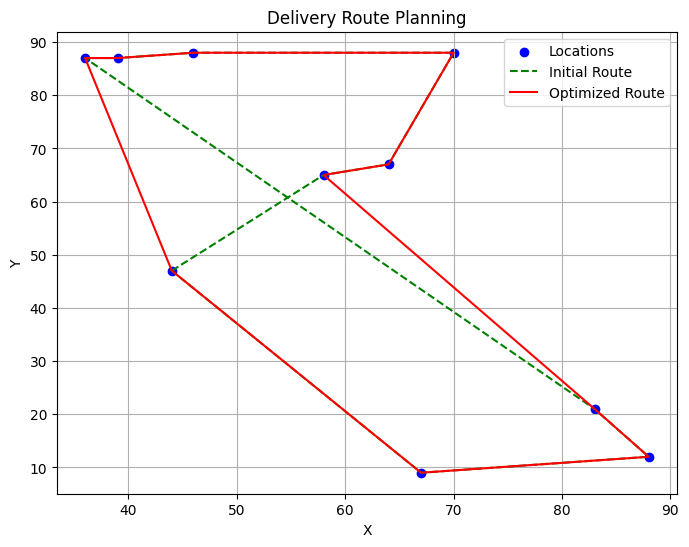

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_locations = 10
grid_size = 100
np.random.seed(0)

# Generate random locations
locations = np.random.randint(0, grid_size, size=(num_locations, 2))

# Function to calculate Euclidean distance between two locations
def distance(location1, location2):
    return np.linalg.norm(location1 - location2)

# Function to calculate total distance of a route
def total_distance(route):
    total = 0
    for i in range(len(route) - 1):
        total += distance(locations[route[i]], locations[route[i + 1]])
    return total

# Nearest neighbor algorithm for initial solution
def nearest_neighbor():
    unvisited = list(range(num_locations))
    route = [0]  # Start at location 0
    unvisited.remove(0)

    while unvisited:
        current_location = route[-1]
        nearest_distance = float('inf')
        nearest_location = None

        for neighbor in unvisited:
            d = distance(locations[current_location], locations[neighbor])
            if d < nearest_distance:
                nearest_distance = d
                nearest_location = neighbor

        route.append(nearest_location)
        unvisited.remove(nearest_location)

    return route

# 2-opt algorithm for local optimization
def two_opt(route):
    improved = True
    best_route = route
    best_distance = total_distance(route)

    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1:
                    continue  # No need to swap adjacent edges
                new_route = route[:]
                new_route[i:j] = route[j - 1:i - 1:-1]  # Reverse segment
                new_distance = total_distance(new_route)

                if new_distance < best_distance:
                    best_distance = new_distance
                    best_route = new_route
                    improved = True

        route = best_route

    return best_route

# Run nearest neighbor algorithm to get initial solution
initial_route = nearest_neighbor()

# Run 2-opt algorithm for local optimization
optimized_route = two_opt(initial_route)

# Plot locations and routes
plt.figure(figsize=(8, 6))
plt.scatter(locations[:, 0], locations[:, 1], color='b', label='Locations')
plt.plot(locations[initial_route + [initial_route[0]], 0], locations[initial_route + [initial_route[0]], 1],
         color='g', linestyle='--', label='Initial Route')
plt.plot(locations[optimized_route + [optimized_route[0]], 0], locations[optimized_route + [optimized_route[0]], 1],
         color='r', label='Optimized Route')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delivery Route Planning')
plt.legend()
plt.grid(True)
plt.show()
